Load the testing data (Unseen data)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import accuracy_score, roc_curve, auc
import numpy
from sklearn import metrics
from sklearn import datasets
import sys
sys.path.append("./pima")
plt.rcParams['figure.figsize'] = (15, 10)

Using TensorFlow backend.


# Load the Data

In [2]:
X_train = np.load('./pima/X_train.npy')
y_train = np.load('./pima/y_train.npy')
X_test = np.load('./pima/X_test.npy')
y_test = np.load('./pima/y_test.npy')
X_deploy = np.load('./pima/X_deploy.npy')
y_deploy = np.load('./pima/y_deploy.npy')

print 'Number of training examples',len(X_train)
print 'Number of validation examples',len(X_test)
print 'Number of testing examples',len(X_deploy)

Number of training examples 491
Number of validation examples 123
Number of testing examples 154


# Initialize the classifiers as the training time


In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=5)
clf_neigh.fit(X_train, y_train)
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(C=20.0)
clf_svm_linear.fit(X_train, y_train)
from sklearn.svm import SVC
clf_svm = SVC(C=5.0, kernel='rbf')
clf_svm.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split=2)
clf_dt.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
clf_dt_IG.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_dt_BGKN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGKN.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt_BGDT = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGDT.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
clf_dt_RF = RandomForestClassifier()
#Training
start_time = time.time()
clf_dt_RF.fit(X_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
clf_dt_AD = AdaBoostClassifier()
clf_dt_AD.fit(X_train, y_train)
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
clf_dt_LDA.fit(X_train, y_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
clf_dt_QDA.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [4]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

from keras.utils import np_utils

labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test)                                              
model = Sequential()
model.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

model.load_weights('/Users/salemameen/Desktop/banditsbook/python_pima/PimaModelbest.hdf5')


model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/keras/utils/np_utils.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = np.zeros((len(y), nb_classes))
/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/keras/utils/np_utils.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


In [5]:
# MAB_NN(2.86%REMOVED) MODEL1 
model1 = Sequential()
model1.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
#model.add(Dropout(0.5))
model1.add(Dense(2, activation="softmax"))


model1.load_weights('/Users/salemameen/Desktop/banditsbook/python_pima/IrisAnnealingSoftmax/pima0.hdf5')
model1.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

In [6]:
# MAB_NN(28.75%REMOVED) MODEL2
model2 = Sequential()
model2.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
#model.add(Dropout(0.5))
model2.add(Dense(2, activation="softmax"))


model2.load_weights('/Users/salemameen/Desktop/banditsbook/python_pima/IrisAnnealingSoftmax/pima9.hdf5')
model2.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

In [7]:
# MAB_NN(82.86%REMOVED) MODEL3
model3 = Sequential()
model3.add(Dense(35,
                input_shape=(8,), 
                activation="relu"))
#model.add(Dropout(0.5))
model3.add(Dense(2, activation="softmax"))


model3.load_weights('/Users/salemameen/Desktop/banditsbook/python_pima/IrisAnnealingSoftmax/pima28.hdf5')
model3.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='Adadelta')

## Deployment Time

In [8]:
start_time = time.time()
y_pred_neigh = clf_neigh.predict(X_deploy)
print("The time of KNN is           %s seconds" % (time.time() - start_time))
# Linear SVM 
start_time = time.time()
y_pred_svm_linear = clf_svm_linear.predict(X_deploy)
print("The time of LSVM is          %s seconds " % (time.time() - start_time))
# SVM kernel='rbf'
start_time = time.time()
y_pred_svm = clf_svm.predict(X_deploy)
print("The time of SVM is           %s seconds " % (time.time() - start_time))
# DT with gini
start_time = time.time()
y_pred_gtgini = clf_dt.predict(X_deploy)
print("The time of DT_gini is       %s seconds " % (time.time() - start_time))
# DT with entorpy
start_time = time.time()
y_pred_dt_IG = clf_dt_IG.predict(X_deploy)
print("The time of DT is            %s seconds" % (time.time() - start_time))
# Bagging with Knn
start_time = time.time()
y_pred_dt_BGKN = clf_dt_BGKN.predict(X_deploy)
print("The time of Bagging Knn is   %s seconds" % (time.time() - start_time))
# Bagging with DT with gini
start_time = time.time()
y_pred_dt_BGDT = clf_dt_BGDT.predict(X_deploy)
print("The time of Bagging DT is    %s seconds " % (time.time() - start_time))
# Random Forest with DT with gini
start_time = time.time()
y_pred_dt_RF = clf_dt_RF.predict(X_deploy)
print("The time of Random Forest is %s seconds " % (time.time() - start_time))
# Ada Boost
start_time = time.time()
y_pred_dt_AD = clf_dt_AD.predict(X_deploy)
print("The time of Ada Boost is     %s seconds " % (time.time() - start_time))
# Naive Bayes
start_time = time.time()
y_pred_NB = clf_NB.predict(X_deploy)
print("The time of Naive Bayes is   %s seconds " % (time.time() - start_time))
# LDA
start_time = time.time()
y_pred_dt_LDA = clf_dt_LDA.predict(X_deploy)
print("The time of LDA is           %s seconds " % (time.time() - start_time))
# QDA
start_time = time.time()
y_pred_dt_QDA = clf_dt_QDA.predict(X_deploy)
print("The time of QDA is           %s seconds " % (time.time() - start_time))
# NN
start_time = time.time()
y_pred_NN = model.predict_classes(X_deploy)
print("The time of NN is            %s seconds " % (time.time() - start_time))
# NN 2.5% removed neurals
start_time = time.time()
y_pred_NN1 = model1.predict_classes(X_deploy)
print("The time of NN2.86 Removed is %s seconds" % (time.time() - start_time))
# NN 7.5% removed neurals
start_time = time.time()
y_pred_NN2 = model2.predict_classes(X_deploy)
print("The time of NN28.75 Removed is %s seconds " % (time.time() - start_time))
# NN 65% removed neurals
start_time = time.time()
y_pred_NN3 = model3.predict_classes(X_deploy)
print("The time of NN65 Removed is  %s seconds " % (time.time() - start_time))
# NN 85% removed neurals
start_time = time.time()

The time of KNN is           0.00211501121521 seconds
The time of LSVM is          0.000301837921143 seconds 
The time of SVM is           0.00121998786926 seconds 
The time of DT_gini is       0.000159025192261 seconds 
The time of DT is            0.000145196914673 seconds
The time of Bagging Knn is   0.00582098960876 seconds
The time of Bagging DT is    0.000867128372192 seconds 
The time of Random Forest is 0.000837087631226 seconds 
The time of Ada Boost is     0.00364589691162 seconds 
The time of Naive Bayes is   0.000205993652344 seconds 
The time of LDA is           0.000128030776978 seconds 
The time of QDA is           0.000197887420654 seconds 
 32/154 [=====>........................] - ETA: 0sThe time of NN65 Removed is  0.0124890804291 seconds 


# Accuracy of the models on Testing data

In [9]:
print "The accuracy of KNN:          \t", metrics.accuracy_score(y_deploy, y_pred_neigh)
print "The accuracy of LSVM:         \t", metrics.accuracy_score(y_deploy, y_pred_svm_linear)
print "The accuracy of SVM:          \t", metrics.accuracy_score(y_deploy, y_pred_svm)
print "The accuracy of DT_gini:      \t", metrics.accuracy_score(y_deploy, y_pred_gtgini)
print "The accuracy of DT_entorpy:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_IG)
print "The accuracy of Bagging Knn:  \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGKN)
print "The accuracy of Bagging DT:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGDT)
print "The accuracy of Random Forest:\t", metrics.accuracy_score(y_deploy, y_pred_dt_RF)
print "The accuracy of Ada Boost:    \t", metrics.accuracy_score(y_deploy, y_pred_dt_AD)
print "The accuracy of Naive Bayes:  \t", metrics.accuracy_score(y_deploy, y_pred_NB)
print "The accuracy of LDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_LDA)
print "The accuracy of QDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_QDA)
print "The accuracy of NN:           \t", metrics.accuracy_score(y_deploy, y_pred_NN)
print "The accuracy of NN2.866R:    \t", metrics.accuracy_score(y_deploy, y_pred_NN1)
print "The accuracy of NN28.75R:     \t", metrics.accuracy_score(y_deploy, y_pred_NN2)
print "The accuracy of NN82.86R:        \t", metrics.accuracy_score(y_deploy, y_pred_NN3)

The accuracy of KNN:          	0.688311688312
The accuracy of LSVM:         	0.636363636364
The accuracy of SVM:          	0.720779220779
The accuracy of DT_gini:      	0.636363636364
The accuracy of DT_entorpy:   	0.636363636364
The accuracy of Bagging Knn:  	0.642857142857
The accuracy of Bagging DT:   	0.675324675325
The accuracy of Random Forest:	0.701298701299
The accuracy of Ada Boost:    	0.668831168831
The accuracy of Naive Bayes:  	0.597402597403
The accuracy of LDA:          	0.649350649351
The accuracy of QDA:          	0.62987012987
The accuracy of NN:           	0.707792207792
The accuracy of NN2.866R:    	0.694805194805
The accuracy of NN28.75R:     	0.694805194805
The accuracy of NN82.86R:        	0.636363636364


# Precision, Recall, F1-score and Support on Testing data

In [10]:
print "\n==================================================================="
print " KNN:"
print metrics.classification_report(y_deploy, y_pred_neigh, target_names=['B', 'M'])

print "\n==================================================================="
print " LSVM:"
print metrics.classification_report(y_deploy, y_pred_svm_linear, target_names=['B', 'M'])

print "\n==================================================================="
print " SVM:"
print metrics.classification_report(y_deploy, y_pred_svm, target_names=['B', 'M'])

print "\n==================================================================="
print " DT_gini:"
print metrics.classification_report(y_deploy, y_pred_gtgini, target_names=['B', 'M'])


print "\n==================================================================="
print " DT_entorpy:"
print metrics.classification_report(y_deploy, y_pred_dt_IG, target_names=['B', 'M'])

print "\n==================================================================="
print " Bagging Knn:"
print metrics.classification_report(y_deploy, y_pred_dt_BGKN, target_names=['B', 'M'])


print "\n==================================================================="
print " Bagging DT:"
print metrics.classification_report(y_deploy, y_pred_dt_BGDT, target_names=['B', 'M'])

print "\n==================================================================="
print " Random Forest:"
print metrics.classification_report(y_deploy, y_pred_dt_RF, target_names=['B', 'M'])


print "\n==================================================================="
print " Ada Boost:"
print metrics.classification_report(y_deploy, y_pred_dt_AD, target_names=['B', 'M'])

print "\n==================================================================="
print " Naive Bayes:"
print metrics.classification_report(y_deploy, y_pred_NB, target_names=['B', 'M'])


print "\n==================================================================="
print " LDA:"
print metrics.classification_report(y_deploy, y_pred_dt_LDA, target_names=['B', 'M'])

print "\n==================================================================="
print " QDA:"
print metrics.classification_report(y_deploy, y_pred_dt_QDA, target_names=['B', 'M'])

print "\n==================================================================="
print " NN:"
print metrics.classification_report(y_deploy, y_pred_NN, target_names=['B', 'M'])

print "\n==================================================================="
print " NN2.86:"
print metrics.classification_report(y_deploy, y_pred_NN1, target_names=['B', 'M'])

print "\n==================================================================="
print " NN28.75:"
print metrics.classification_report(y_deploy, y_pred_NN2, target_names=['B', 'M'])

print "\n==================================================================="
print " NN82.86:"
print metrics.classification_report(y_deploy, y_pred_NN3, target_names=['B', 'M'])


 KNN:
             precision    recall  f1-score   support

          B       0.71      0.87      0.78        97
          M       0.63      0.39      0.48        57

avg / total       0.68      0.69      0.67       154


 LSVM:
             precision    recall  f1-score   support

          B       0.65      0.92      0.76        97
          M       0.53      0.16      0.24        57

avg / total       0.61      0.64      0.57       154


 SVM:
             precision    recall  f1-score   support

          B       0.74      0.87      0.80        97
          M       0.68      0.47      0.56        57

avg / total       0.71      0.72      0.71       154


 DT_gini:
             precision    recall  f1-score   support

          B       0.71      0.72      0.71        97
          M       0.51      0.49      0.50        57

avg / total       0.63      0.64      0.63       154


 DT_entorpy:
             precision    recall  f1-score   support

          B       0.70      0.73      0

# Receiver Operating Characteristic

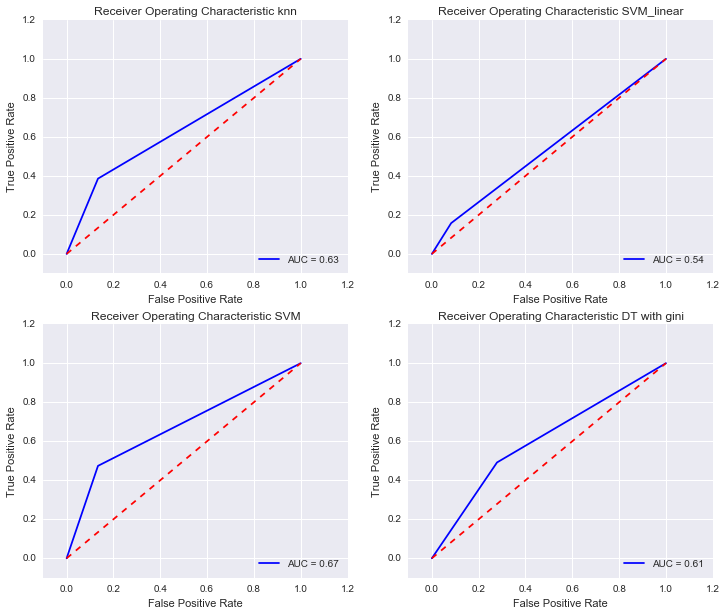

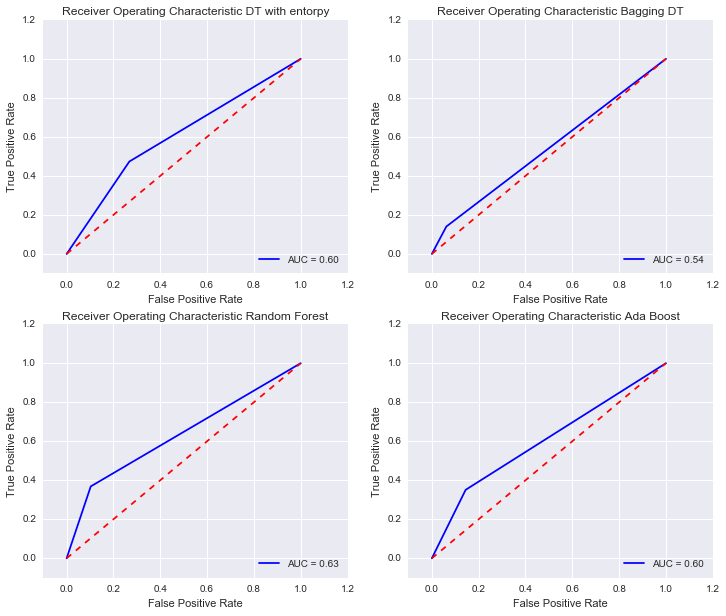

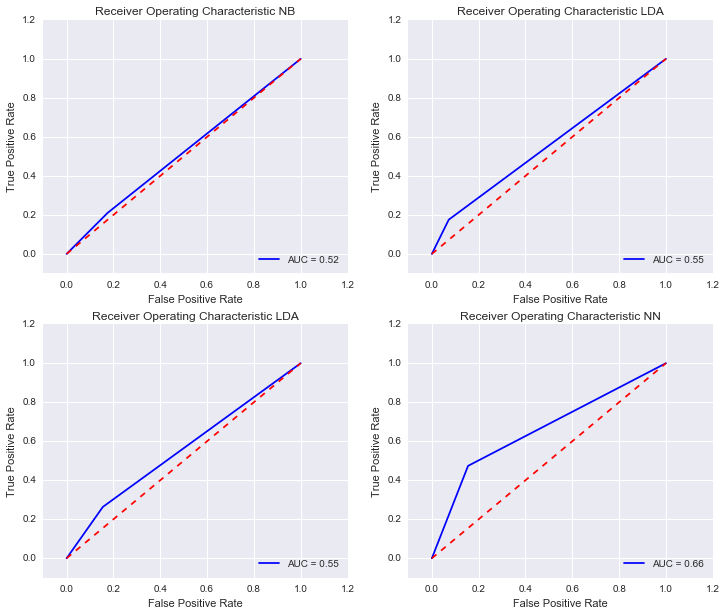

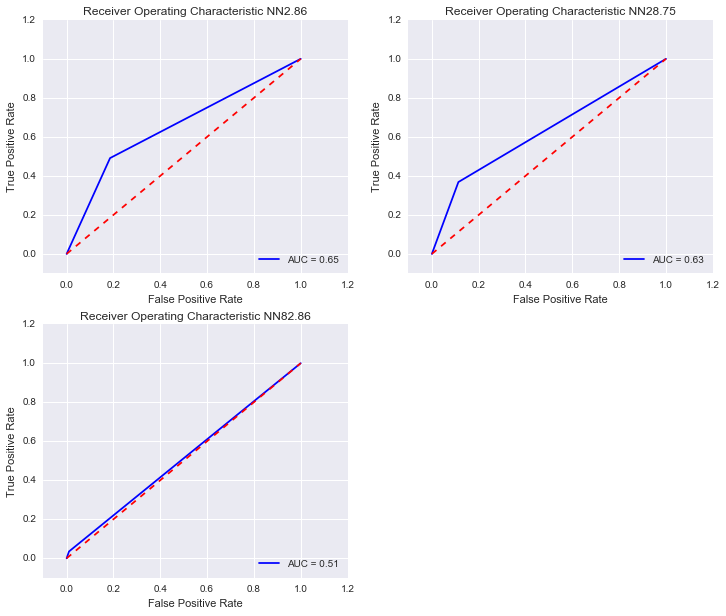

In [11]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.figure(1)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_neigh)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic knn')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_svm_linear)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic SVM_linear')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
##############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic SVM')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_gtgini)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic DT with gini')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
##############################################################################
plt.figure(2)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_IG)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic DT with entorpy')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
################################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_BGKN)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Bagging DT')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_RF)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Random Forest')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_AD)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic Ada Boost')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
###############################################################################
##############################################################################
plt.figure(3)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NB)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NB')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
################################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_LDA)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic LDA')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_dt_QDA)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic LDA')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,4)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NN')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.figure(4)
plt.subplot(2,2,1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NN2.86')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN2)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NN28.75')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
###############################################################################
plt.subplot(2,2,3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_deploy, y_pred_NN3)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic NN82.86')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Plot the results

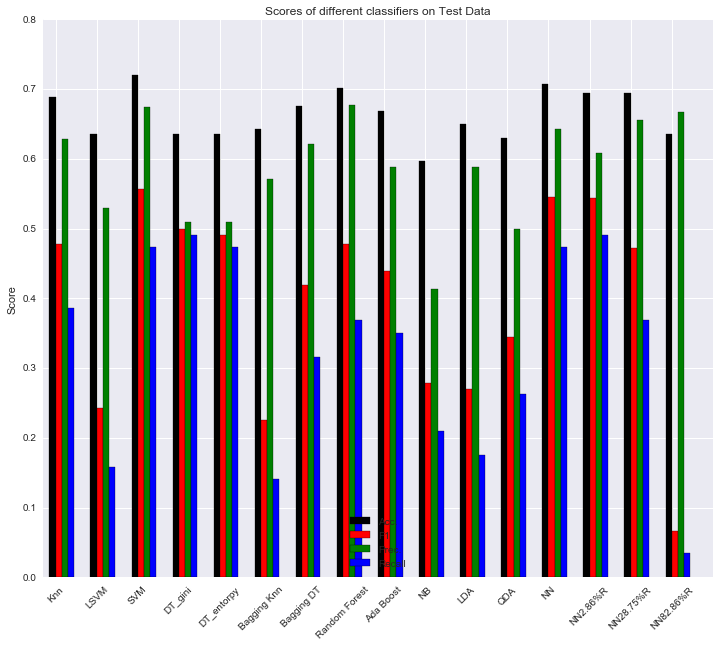

In [12]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15, 6)
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),
           metrics.accuracy_score(y_deploy, y_pred_NN),
           metrics.accuracy_score(y_deploy, y_pred_NN1),
           metrics.accuracy_score(y_deploy, y_pred_NN2),
           metrics.accuracy_score(y_deploy, y_pred_NN3)]

PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="binary"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="binary"),
               metrics.precision_score(y_deploy, y_pred_svm, average="binary"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="binary"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="binary"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="binary"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="binary"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="binary"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="binary"),
               metrics.precision_score(y_deploy, y_pred_NB, average="binary"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="binary"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="binary"),
               metrics.precision_score(y_deploy, y_pred_NN, average="binary"),
               metrics.precision_score(y_deploy, y_pred_NN1, average="binary"),
               metrics.precision_score(y_deploy, y_pred_NN2, average="binary"),
               metrics.precision_score(y_deploy, y_pred_NN3, average="binary")]
RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="binary"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="binary"),
              metrics.recall_score(y_deploy, y_pred_svm, average="binary"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="binary"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="binary"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="binary"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="binary"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="binary"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="binary"),
              metrics.recall_score(y_deploy, y_pred_NB, average="binary"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="binary"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="binary"),
              metrics.recall_score(y_deploy, y_pred_NN, average="binary"),
              metrics.recall_score(y_deploy, y_pred_NN1, average="binary"),
              metrics.recall_score(y_deploy, y_pred_NN2, average="binary"),
              metrics.recall_score(y_deploy, y_pred_NN3, average="binary")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="binary"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="binary"),
          metrics.f1_score(y_deploy, y_pred_svm, average="binary"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="binary"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="binary"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="binary"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="binary"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="binary"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="binary"),
          metrics.f1_score(y_deploy, y_pred_NB, average="binary"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="binary"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="binary"),
          metrics.f1_score(y_deploy, y_pred_NN, average="binary"),
          metrics.f1_score(y_deploy, y_pred_NN1, average="binary"),
          metrics.f1_score(y_deploy, y_pred_NN2, average="binary"),
          metrics.f1_score(y_deploy, y_pred_NN3, average="binary")]
N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.15                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,0.8)
ax.set_ylabel('Score')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' , 'NN', 'NN2.86%R' , 'NN28.75%R' , 'NN82.86%R']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8 )
plt.show()

# Compute Confusion Matrix

In [13]:
iris = datasets.load_iris()
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (15, 6)
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    target_names=['not diabetes', 'diabetes']
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Compute Confusion on Knn

Confusion matrix, without normalization
[[84 13]
 [35 22]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.61  0.39]]


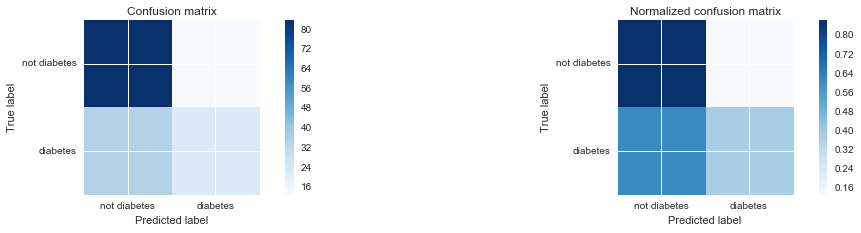

In [14]:
cm = confusion_matrix(y_deploy, y_pred_neigh)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()


## Compute Confusion on LSVM

Confusion matrix, without normalization
[[89  8]
 [48  9]]
Normalized confusion matrix
[[ 0.92  0.08]
 [ 0.84  0.16]]


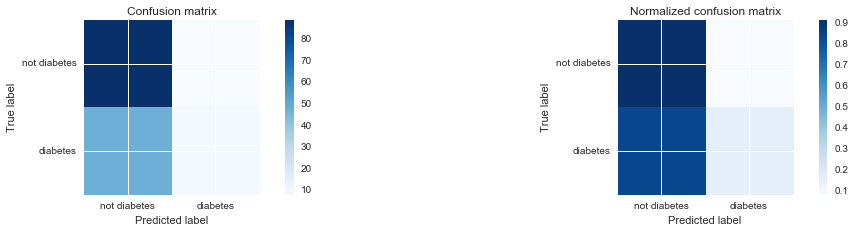

In [15]:
cm = confusion_matrix(y_deploy, y_pred_svm_linear)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on SVM

Confusion matrix, without normalization
[[84 13]
 [30 27]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.53  0.47]]


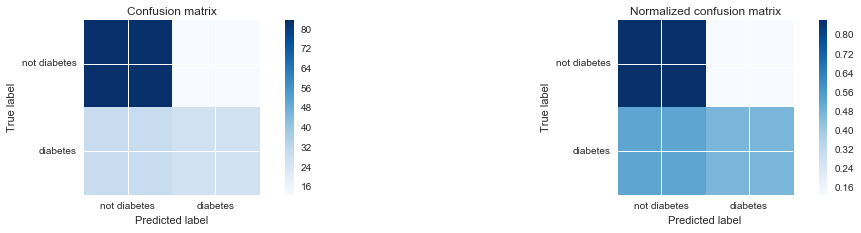

In [16]:
cm = confusion_matrix(y_deploy, y_pred_svm)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with gini "CART"

Confusion matrix, without normalization
[[70 27]
 [29 28]]
Normalized confusion matrix
[[ 0.72  0.28]
 [ 0.51  0.49]]


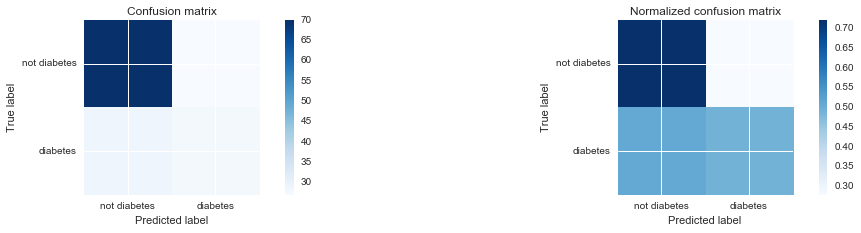

In [17]:
cm = confusion_matrix(y_deploy, y_pred_gtgini)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with entory "C5.0"

Confusion matrix, without normalization
[[71 26]
 [30 27]]
Normalized confusion matrix
[[ 0.73  0.27]
 [ 0.53  0.47]]


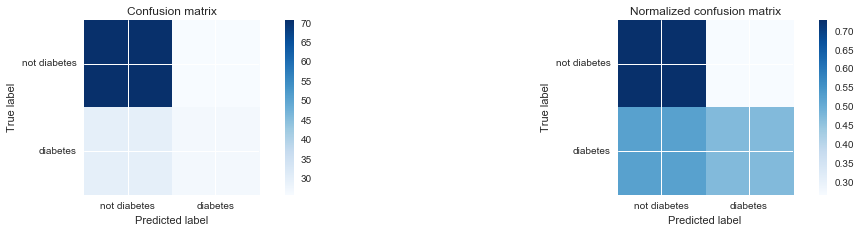

In [18]:
cm = confusion_matrix(y_deploy, y_pred_dt_IG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with Knn

Confusion matrix, without normalization
[[91  6]
 [49  8]]
Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.86  0.14]]


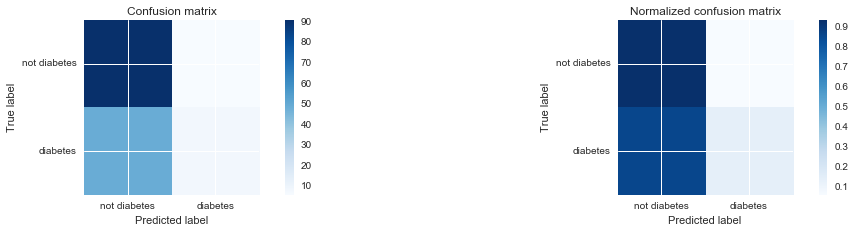

In [19]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGKN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with DT "CART"

Confusion matrix, without normalization
[[86 11]
 [39 18]]
Normalized confusion matrix
[[ 0.89  0.11]
 [ 0.68  0.32]]


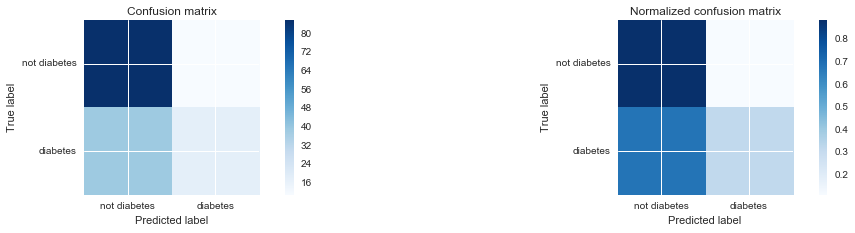

In [20]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGDT)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Random Forest

Confusion matrix, without normalization
[[87 10]
 [36 21]]
Normalized confusion matrix
[[ 0.9   0.1 ]
 [ 0.63  0.37]]


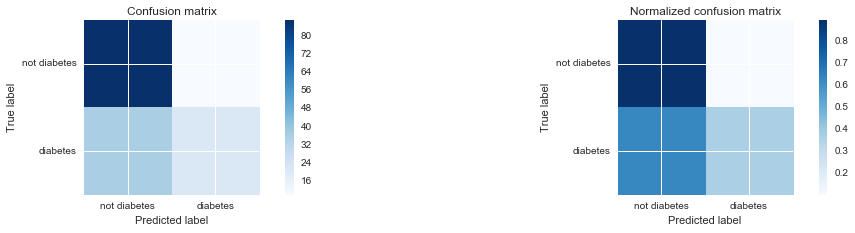

In [21]:
cm = confusion_matrix(y_deploy, y_pred_dt_RF)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Ada Boost

Confusion matrix, without normalization
[[83 14]
 [37 20]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.65  0.35]]


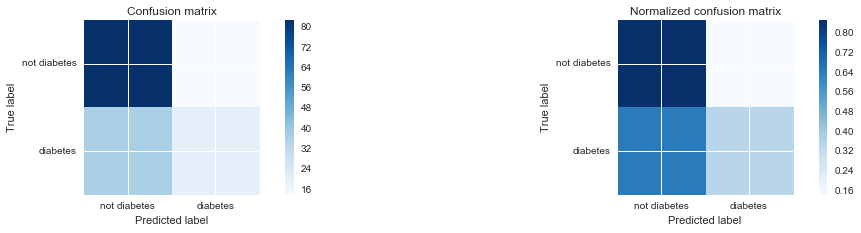

In [22]:
cm = confusion_matrix(y_deploy, y_pred_dt_AD)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Naive Bayes


Confusion matrix, without normalization
[[80 17]
 [45 12]]
Normalized confusion matrix
[[ 0.82  0.18]
 [ 0.79  0.21]]


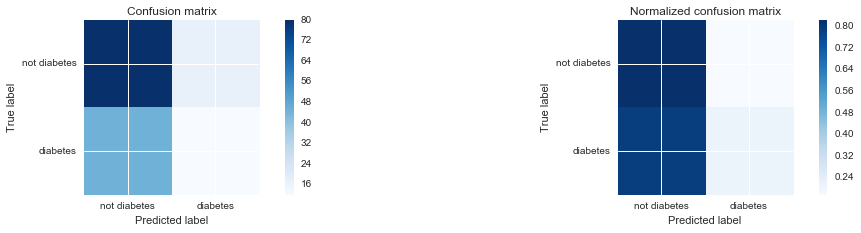

In [23]:
cm = confusion_matrix(y_deploy, y_pred_NB)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on LDA

Confusion matrix, without normalization
[[90  7]
 [47 10]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.82  0.18]]


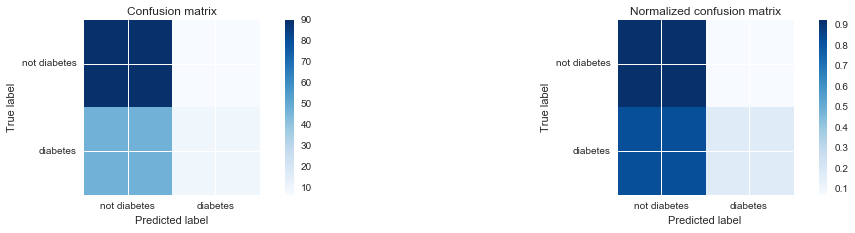

In [24]:
cm = confusion_matrix(y_deploy, y_pred_dt_LDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on QDA

Confusion matrix, without normalization
[[82 15]
 [42 15]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.74  0.26]]


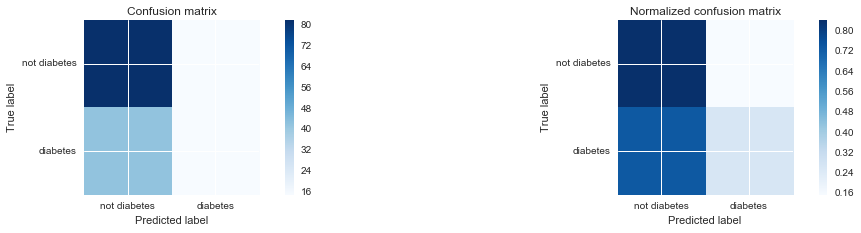

In [25]:
cm = confusion_matrix(y_deploy, y_pred_dt_QDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN


Confusion matrix, without normalization
[[82 15]
 [30 27]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.53  0.47]]


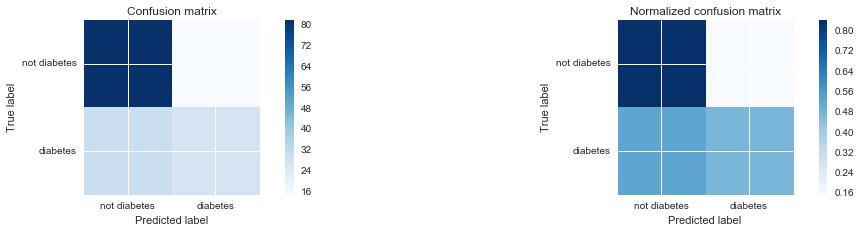

In [26]:
cm = confusion_matrix(y_deploy, y_pred_NN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 2.86% neurals removed

Confusion matrix, without normalization
[[79 18]
 [29 28]]
Normalized confusion matrix
[[ 0.81  0.19]
 [ 0.51  0.49]]


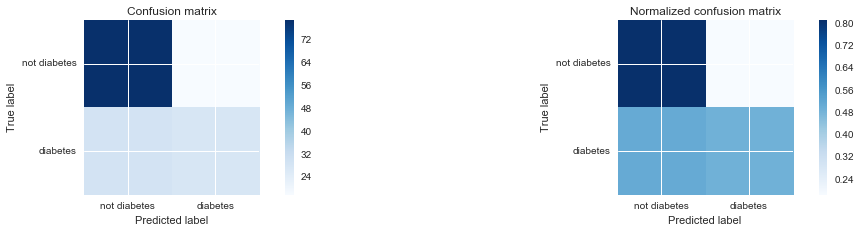

In [27]:
cm = confusion_matrix(y_deploy, y_pred_NN1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 28.75% neurals removed


Confusion matrix, without normalization
[[86 11]
 [36 21]]
Normalized confusion matrix
[[ 0.89  0.11]
 [ 0.63  0.37]]


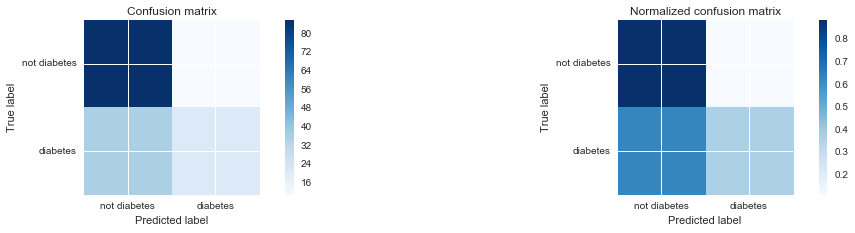

In [28]:
cm = confusion_matrix(y_deploy, y_pred_NN2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 82.86% neurals removed

Confusion matrix, without normalization
[[96  1]
 [55  2]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.96  0.04]]


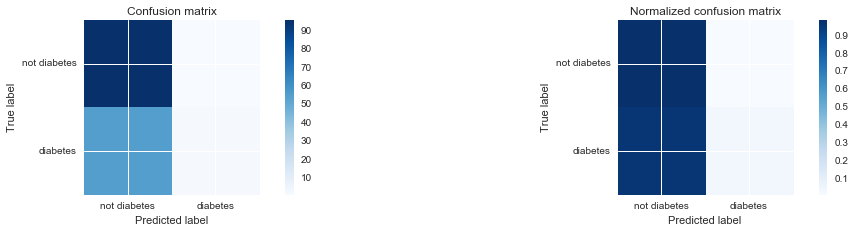

In [29]:
cm = confusion_matrix(y_deploy, y_pred_NN3)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()